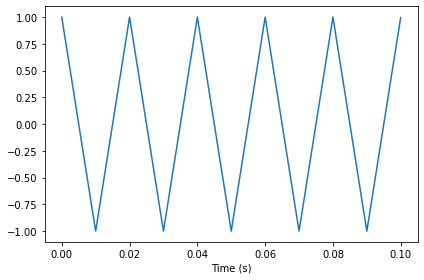

In [71]:
import numpy as np
import matplotlib as plt
from thinkdsp import *

wave = TriangleSignal(freq=50).make_wave(duration=0.10, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

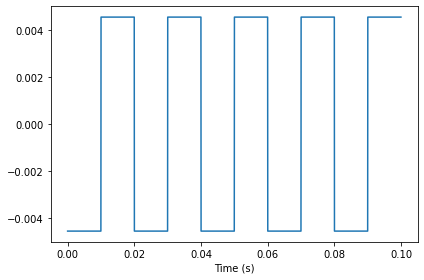

In [72]:
wave_diff = wave.diff()
wave_diff.plot()
decorate(xlabel='Time (s)')

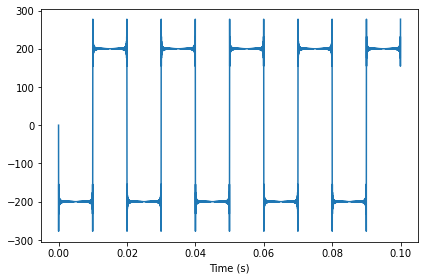

In [59]:
wave.make_spectrum().differentiate().make_wave().plot()
decorate(xlabel='Time (s)')

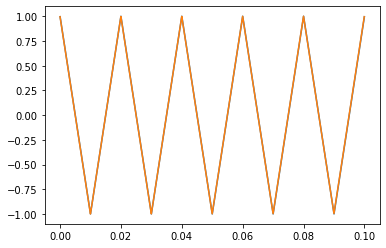

In [77]:
wave_sum = wave_diff.cumsum()
wave_sum.unbias()
spec_int = wave_diff.make_spectrum().integrate()
spec_int.hs[0] = 0
wave_int = spec_int.make_wave()
wave_int.normalize()
wave_sum.plot()
wave_int.plot()

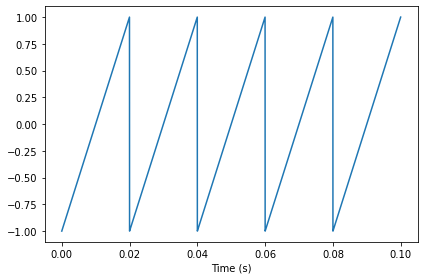

In [86]:
wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

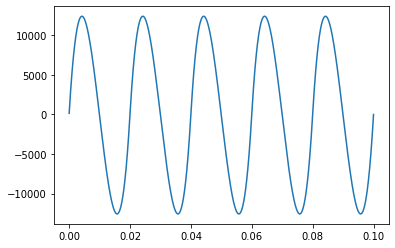

In [88]:
wave_sum = wave.cumsum()
wave_sum.unbias()
wave_sum = wave_sum.cumsum()
wave_sum.plot()

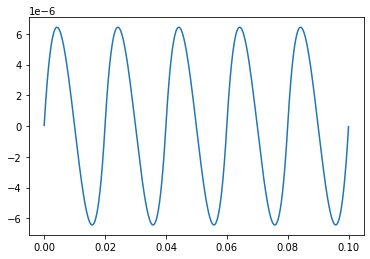

In [89]:
spec_int = wave.make_spectrum().integrate().integrate()
spec_int.hs[0] = 0
wave_int = spec_int.make_wave()
wave_int.plot()

(0.0, 500.0)

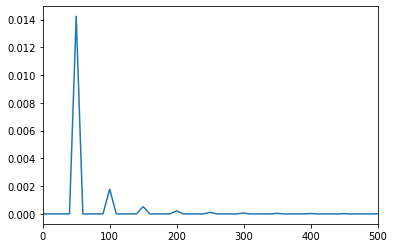

In [92]:
wave_int.make_spectrum().plot()
plt.xlim(left=0, right=500)

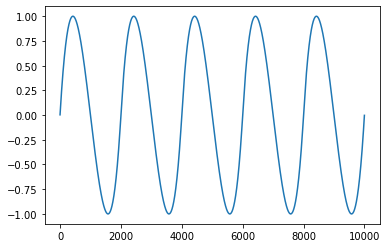

In [97]:
wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
wave.plot()

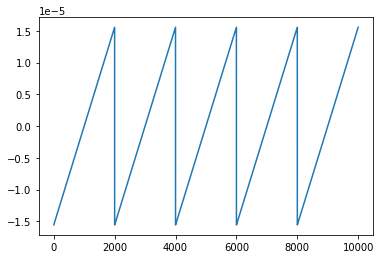

In [98]:
wave_diff = wave.diff().diff()
wave_diff.plot()

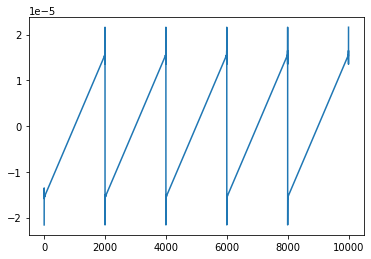

In [99]:
wave_der = wave.make_spectrum().differentiate().differentiate().make_wave()
wave_der.plot()

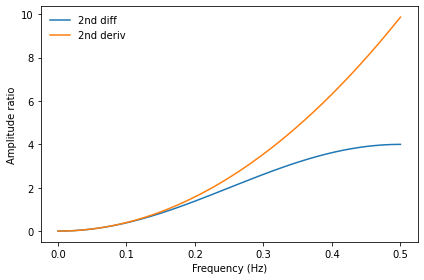

In [101]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(wave))
diff_wave = Wave(padded, framerate=wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

deriv_filter = wave.make_spectrum()
deriv_filter.hs = (np.pi * 2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')